In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd

## 获取数据

In [14]:
def seg_2_csv(test_rcg_seg, l_name, r_name,player_dict):
    import re
    cycle_exp = "show (\d+) "
    cycle_time = re.search(cycle_exp, test_rcg_seg)
    time = cycle_time.group(1)
    time
   

    ball_state_exp = "b\) (.*?)\)"
    ball_state = re.search(ball_state_exp, test_rcg_seg)
    ball_state = ball_state.group(1).split(" ")

    ball_x, ball_y, ball_vel_x, ball_vel_y = ball_state[0], ball_state[1], ball_state[2], ball_state[3]

    

    segle_player_exp = "\(\(((l|r).*?)\)\)"
    all_side = re.findall(segle_player_exp, test_rcg_seg)
    all_side[0]
    


    for (count, i) in enumerate(all_side):
        side = i[1]
        player_info_exp = "(l|r)(.*?)\("
        player_info = re.search(player_info_exp, i[0]).group(0)
        player_info = player_info.replace(")", "").split()

        name_pre = None
        if side == "l":
            name_pre = l_name
        else:
            name_pre = r_name
        
        if player_info[0] is 'l':
            player_info[0] = -1
        else:player_info[0]=1

        #init
        if len(player_dict)<1:
            player_dict["time"] = [time]
            player_dict["ball_x"] = [ball_x]
            player_dict["ball_y"] = [ball_y]
            player_dict["ball_vx"] = [ball_vel_x]
            player_dict["ball_vy"] = [ball_vel_y]
            player_dict["player_side"] = [player_info[0]]
            player_dict["team_name"] = [name_pre]
            player_dict["player_num"] = [name_pre + "_" + player_info[1]]
            #player_dict["player_type"] = [player_info[2]]
            #player_dict["player_state"] = [player_info[3]]
            player_dict["player_x"] = [player_info[4]]
            player_dict["player_y"] = [player_info[5]]
            player_dict["player_vx"] = [player_info[6]]
            player_dict["player_vy"] = [player_info[7]]

            
            
        else:
            player_dict["time"].append(time)
            player_dict["ball_x"].append(ball_x)
            player_dict["ball_y"].append(ball_y)
            player_dict["ball_vx"].append(ball_vel_x)
            player_dict["ball_vy"].append(ball_vel_y)
            player_dict["player_side"].append(player_info[0])
            player_dict["team_name"].append(name_pre)
            player_dict["player_num"].append(name_pre + "_" + player_info[1])
            #player_dict["player_type"].append(player_info[2])
            #player_dict["player_state"].append(player_info[3])
            player_dict["player_x"].append(player_info[4])
            player_dict["player_y"].append(player_info[5])
            player_dict["player_vx"].append(player_info[6])
            player_dict["player_vy"].append(player_info[7])
            

           
            


if __name__ == "__main__":

    rcg=open("MT-YuShan1.rcg","r")
    player_dict={}
    for (count,i) in enumerate(rcg):
        if "show" in i:
           
            seg_2_csv(i,"MT","YuShan",player_dict)

    import  pandas as pd
    df=pd.DataFrame(player_dict)
    df.to_csv("MT_VS_YuShan.csv",index=False)
    print("ok")

ok


# 数据整理

In [15]:
import pandas  as pd
import numpy as np
import random


data=pd.read_csv("MT_VS_YuShan.csv")



ball_x,ball_y,player_x,player_y = data["ball_x"],data["ball_y"],data["player_x"],data["player_y"]

ball = [ball_x,ball_y]
player = [player_x,player_y]

ball_a = np.array(list(zip(ball_x,ball_y)))
player_a = np.array(list(zip(player_x,player_y)))
#ball_a=np.split(ball,(2,),axis=0)

ball_X=[]
for i in range(len(ball_a)):
    if ball_x[i] < -20:
        ball_X.append(-20)
    elif ball_x[i] <0:
        ball_X.append(0)
    elif ball_x[i] <20:
        ball_X.append(20)
    else:
        ball_X.append(36)
#print(ball_X)


#计算截求周期  我方小 1   否侧 0
dist=[]
for i in range(0,len(ball_a),22):
    min_dist1=1000.0
    min_dist2=1000.0
     #计算左边球队的最小截求周期 不计算守门员
    count=i+1
   
    for co in range(10):
        X=player_a[count][0] - ball_a[count][0]
        Y=player_a[count][1] - ball_a[count][1]
        dis=(X**2+Y**2)**0.5
       # print(dis)
        if dis < min_dist1:
            min_dist1 = dis
        count = count+1
    count=count+1
    #算右边球队的最小截求周期 不计算守门员
    for co in range(10):
        X=player_a[count][0] - ball_a[count][0]
        Y=player_a[count][1] - ball_a[count][1]
        dis=(X**2+Y**2)**0.5
        if  dis<min_dist2:
            min_dist2 = dis
        count = count+1
    
    if min_dist1 < min_dist2:
        for co in range(11):
            dist.append(1)
        for co in range(11):
            dist.append(0)
    else:
        for co in range(11):
            dist.append(0)
           
        for co in range(11):
            dist.append(1)

            
# 结果
'''
de=[]
#print(type(ball_x),len(dist),dist[0:100])
for i in range(len(ball_x)):
    de.append(random.randint(0,1))

'''

    
des=[]   
for i in range(len(ball_x)):
    if dist[i] is 1:
        if  ball_X[i] is -20:  
            if data["ball_vx"][i] < 0:
                des.append(1)
            else:des.append(0)
        else:des.append(0)
    if dist[i] is 0:
        if ball_X[i] is 36:
            des.append(0)
        elif ball_X[i] is 20:
            if data["ball_vx"][i] >0:
                des.append(0)
            else:
                des.append(1)
        else:
            des.append(1)

descion_data=np.array(list(zip(ball_X,data["ball_vx"],dist,des)))


print('ok')

ok


# 尝试

## 生成决策树

In [16]:
# 对原始数据进行分为训练数据和测试数据
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus

feature_name = 'ball_x','ball_vx','intercept'
de_class = 'no','yes'

x, y = np.split(descion_data,(3,),axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')#criterion='entropy'
#print(clf)
#print(len(x_train),x_train,len(y_train),y_train)
clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
dot_data =tree.export_graphviz(
        clf,
        out_file = None,
        feature_names= feature_name,
        filled = True,
        impurity = False,
        rounded = True,
        class_names=de_class
        #special_characters=True
    )

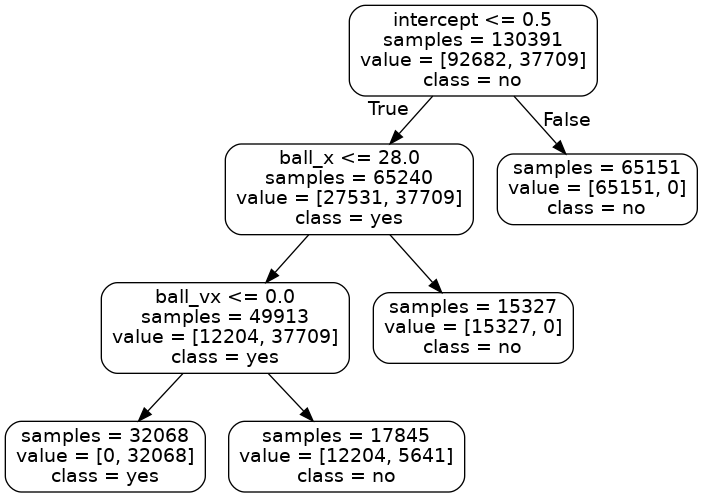

In [18]:
#pip install pydotplus
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

graph.get_nodes()[2].set_fillcolor("#ffffff")
graph.get_nodes()[2].set_fillcolor("#ffffff")
graph.get_nodes()[3].set_fillcolor("#ffffff")
graph.get_nodes()[4].set_fillcolor("#ffffff")
graph.get_nodes()[5].set_fillcolor("#ffffff")
graph.get_nodes()[6].set_fillcolor("#ffffff")
graph.get_nodes()[7].set_fillcolor("#ffffff")
graph.get_nodes()[8].set_fillcolor("#ffffff")

graph.write_png('decion_tree_2D.png')

from IPython.display import Image
Image(graph.create_png())

In [19]:
# 系数反映每个特征的影响力。越大表示该特征在分类中起到的作用越大
print("ball_x     ","ball_vx   ","intercept")
print(clf.feature_importances_)
# 使用训练数据预测，预测结果完全正确
answer = clf.predict(x_train)
y_train = y_train.reshape(-1)

print(answer)
print(y_train)
print(np.mean(answer == y_train))

# 对测试数据进行预测，准确度较低，说明过拟合
answer = clf.predict(x_test)
y_test = y_test.reshape(-1)
print(answer)
print(y_test)
print(np.mean(answer == y_test))

ball_x      ball_vx    intercept
[0.24761111 0.24713121 0.50525767]
[0. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 1. 0. 1.]
0.9567378116587801
[0. 0. 0. ... 1. 0. 1.]
[0. 0. 0. ... 1. 0. 1.]
0.9552815704239214


In [137]:

import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus


play_feature_E = 'outlook', 'temperature', 'humidity', 'windy'
play_class = 'yes', 'no'

# 1、读入数据，并将原始数据中的数据转换为数字形式
data = np.loadtxt("play.txt", delimiter=",", dtype=int)

#print(data)


x, y = np.split(data,(4,),axis=1)

# 2、拆分训练数据与测试数据，为了进行交叉验证
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 3、使用信息熵作为划分标准，对决策树进行训练
clf = tree.DecisionTreeClassifier(criterion='entropy',)
#print(clf)

print(len(x_train),x_train,len(y_train),y_train,y)

clf.fit(x_train, y_train)

# 4、把决策树结构写入文件
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=play_feature_E, class_names=play_class,
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('play1.pdf')

# 系数反映每个特征的影响力。越大表示该特征在分类中起到的作用越大
print(clf.feature_importances_)

# 5、使用训练数据预测，预测结果完全正确
answer = clf.predict(x_train)
y_train = y_train.reshape(-1)
print(answer)
print(y_train)
print(np.mean(answer == y_train))

# 6、对测试数据进行预测，准确度较低，说明过拟合
answer = clf.predict(x_test)
y_test = y_test.reshape(-1)
print(answer)
print(y_test)
print(np.mean(answer == y_test))



9 [[2 1 0 0]
 [3 3 0 1]
 [1 2 0 1]
 [3 2 1 1]
 [1 1 1 1]
 [3 2 1 0]
 [1 3 0 0]
 [2 2 1 1]
 [3 2 0 0]] 9 [[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]] [[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
[0.25407758 0.33333333 0.         0.41258908]
[1 0 1 0 0 1 1 1 1]
[1 0 1 0 0 1 1 1 1]
1.0
[1 1 1 1 1]
[0 1 1 0 1]
0.6


In [43]:
# 对原始数据进行分为训练数据和测试数据
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus

play_feature_E = 'ball_x', 'ball_vx', 'inpceter'
play_class = 'yes', 'no'



0
11
22
33
44
55
66
77
88
99
